In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pyarrow as pa
import pyarrow.parquet as pq
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import to_categorical

In [2]:
pic_size = 48

In [3]:
base_path = 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Kaggle Dataset'

In [4]:
df = pd.read_csv(base_path+'\\icml_face_data.csv', header=None)

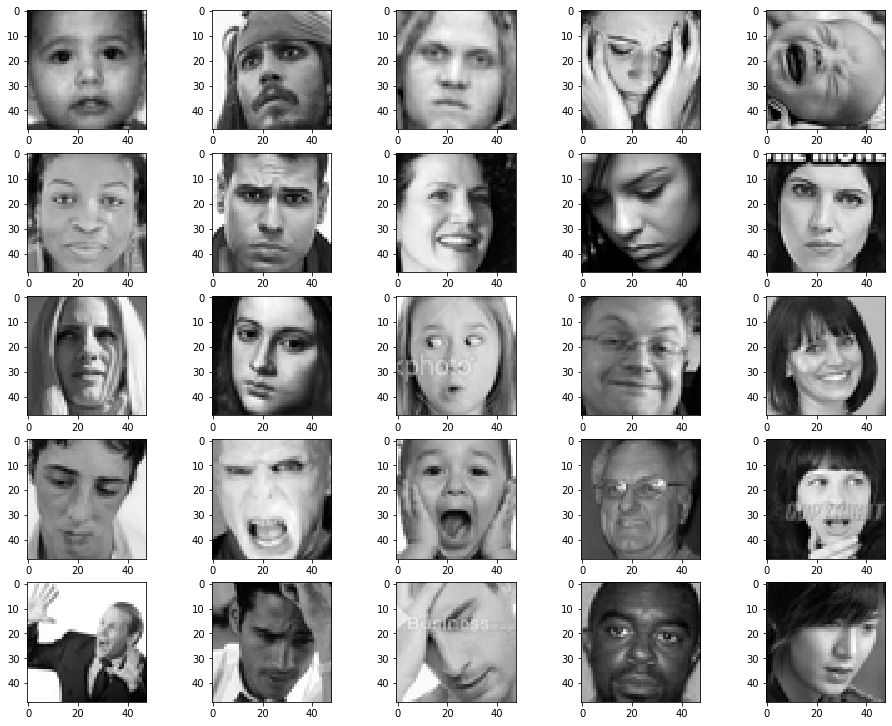

In [5]:
sample_df = df.sample(25)
cpt = 0
i = 0
pl.figure(0, figsize=(16,18))
for row in range(5):
    for col in range(5):
        cpt += 1
        pl.subplot(7,5,cpt)
        img = array_to_img(np.array(sample_df.iloc[i,2:2306]).reshape(48,48,1))
        pl.imshow(img, cmap='gray')
        i += 1
pl.show()

In [6]:
scaler = MinMaxScaler()

In [7]:
scaled_df = df
scaled_df.iloc[:,2:2306] = scaler.fit_transform(df.iloc[:,2:2306])

In [8]:
X_train = scaled_df.loc[df[1]=='Training'].iloc[:,2:2306]
X_test = scaled_df.loc[df[1]=='PublicTest'].iloc[:,2:2306]
X_val = scaled_df.loc[df[1]=='PrivateTest'].iloc[:,2:2306]

In [9]:
X_train.head()

,2,3,4,5,6,7,8,9,10,11,...,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.623529,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.411765,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.407843,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.682353,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.047059,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647


In [10]:
Y_train = pd.DataFrame(to_categorical(scaled_df.loc[df[1]=='Training'][0]))
Y_test = pd.DataFrame(to_categorical(scaled_df.loc[df[1]=='PublicTest'][0]))
Y_val = pd.DataFrame(to_categorical(scaled_df.loc[df[1]=='PrivateTest'][0]))

In [11]:
Y_train.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
print(X_train.shape, X_test.shape, X_val.shape)

(28709, 2304) (3589, 2304) (3589, 2304)


In [13]:
print(Y_train.shape, Y_test.shape, Y_val.shape)

(28709, 7) (3589, 7) (3589, 7)


In [14]:
train_images = pa.Table.from_pandas(X_train)
test_images = pa.Table.from_pandas(X_test)
val_images = pa.Table.from_pandas(X_val)
pq.write_table(train_images, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Images\\train_images.parquet')
pq.write_table(test_images, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Images\\test_images.parquet')
pq.write_table(val_images, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Images\\val_images.parquet')

In [15]:
train_labels = pa.Table.from_pandas(Y_train)
test_labels = pa.Table.from_pandas(Y_test)
val_labels = pa.Table.from_pandas(Y_val)
pq.write_table(train_labels, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Labels\\train_labels.parquet')
pq.write_table(test_labels, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Labels\\test_labels.parquet')
pq.write_table(val_labels, 'C:\\Users\\rbush\\Documents\\Projects\\Computer Vision\\Facial Expressions\\Training Data\\Labels\\val_labels.parquet')